# a pythonic deck card

In [41]:
from collections import namedtuple

# use namedtuple to build classes of objects that
# are just bundles of attributes with no custom methods, like a database record
Card = namedtuple("Card",['rank', 'suit'])

Card("1","diamond")


Card(rank='1', suit='diamond')

In [42]:
list(range(2,11))

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [43]:
# shocasing the dunder (double undescore) method getitem

class FrenchDeck:
    ranks = [str(n) for n in range(2,11)] + list("JQKA")
    suits = "spades diamonds clubs hearts".split()

    def __init__(self):
        self._cards = [Card(rank, suit) for rank in self.ranks
                                        for suit in self.suits]
    
    def __len__(self):
        return len(self._cards)
    
    def __getitem__(self, idx):
        return self._cards[idx]

In [44]:
french_deck = FrenchDeck()

In [45]:
for i in french_deck[:10]:
    print(i)

Card(rank='2', suit='spades')
Card(rank='2', suit='diamonds')
Card(rank='2', suit='clubs')
Card(rank='2', suit='hearts')
Card(rank='3', suit='spades')
Card(rank='3', suit='diamonds')
Card(rank='3', suit='clubs')
Card(rank='3', suit='hearts')
Card(rank='4', suit='spades')
Card(rank='4', suit='diamonds')


In [46]:
# the beauty about dunder methods, is we leverage system functions

from random import choice

choice(french_deck)

Card(rank='2', suit='hearts')

In [47]:
# slicing our deck
french_deck[0:20:4]

[Card(rank='2', suit='spades'),
 Card(rank='3', suit='spades'),
 Card(rank='4', suit='spades'),
 Card(rank='5', suit='spades'),
 Card(rank='6', suit='spades')]

In [48]:
# reversed our deck
rversed = reversed(french_deck) # return iterator
for i in range(0,3):
    print(next(rversed))


Card(rank='A', suit='hearts')
Card(rank='A', suit='clubs')
Card(rank='A', suit='diamonds')


In [49]:
# iteration is often implicit. If a collection has no __contains__ method, the in opera‐
#tor does a sequential scan
Card("2", "diamonds") in french_deck

True

In [50]:
french_deck.ranks

['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

In [51]:
french_deck.ranks.index("10")

8

In [52]:
# doing sorting, 
"""
A common system of ranking cards is by rank (with aces being
highest), then by suit in the order of spades (highest), hearts, diamonds, and clubs
(lowest)
"""
suit_values = dict(spades=3, hearts=2, diamonds=1, clubs=0)

def sort_func_spades_high(card):
    rank_value = french_deck.ranks.index(card.rank)
    return rank_value * len(suit_values) + suit_values[card.suit] # a made up rank formula


In [53]:
s_deck = sorted(french_deck, key=sort_func_spades_high)

s_deck[:10]

[Card(rank='2', suit='clubs'),
 Card(rank='2', suit='diamonds'),
 Card(rank='2', suit='hearts'),
 Card(rank='2', suit='spades'),
 Card(rank='3', suit='clubs'),
 Card(rank='3', suit='diamonds'),
 Card(rank='3', suit='hearts'),
 Card(rank='3', suit='spades'),
 Card(rank='4', suit='clubs'),
 Card(rank='4', suit='diamonds')]

In [54]:
# note:
"""
By implementing the special methods __len__ and __getitem__, our FrenchDeck
behaves like a standard Python sequence, allowing it to benefit from core language
features (e.g., iteration and slicing) and from the standard library
"""


'\nBy implementing the special methods __len__ and __getitem__, our FrenchDeck\nbehaves like a standard Python sequence, allowing it to benefit from core language\nfeatures (e.g., iteration and slicing) and from the standard library\n'

# handling numeric types

In [91]:
# a vector class
import math

class Vector:
    def __init__(self, x: int=0, y: int=0):
        self.x = x
        self.y = y

    def __repr__(self):
        return f"Vector({self.x}, {self.y})"
    
    def __abs__(self):
        return math.hypot(self.x, self.y)
    
    def __bool__(self):
        return bool(abs(self)) # this will call __abs__
    
    def __add__(self, other: Vector): # type: ignore
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)
    
    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)
    
    def __eq__(self, other):
        """
        will be define equals, if repre is the same
        """
        if type(self) != type(other):
            return NotImplemented
        return str(self) == str(other)
    
    # needed because we implemented __eq__
    def __hash__(self) -> int:
        return hash((self.x, self.y))

In [92]:
a = Vector(40,20)
b = Vector(20, 30)

a + b

Vector(60, 50)

In [93]:
Vector(5,5) * 5 == Vector(25, 25)

True

In [94]:
assert(abs(Vector(3,4)) == 5)
assert( Vector(5,5) * 5 == Vector(25,25))

In [96]:
set([Vector(1,2), Vector(3,4), Vector(3,4)])

{Vector(1, 2), Vector(3, 4)}

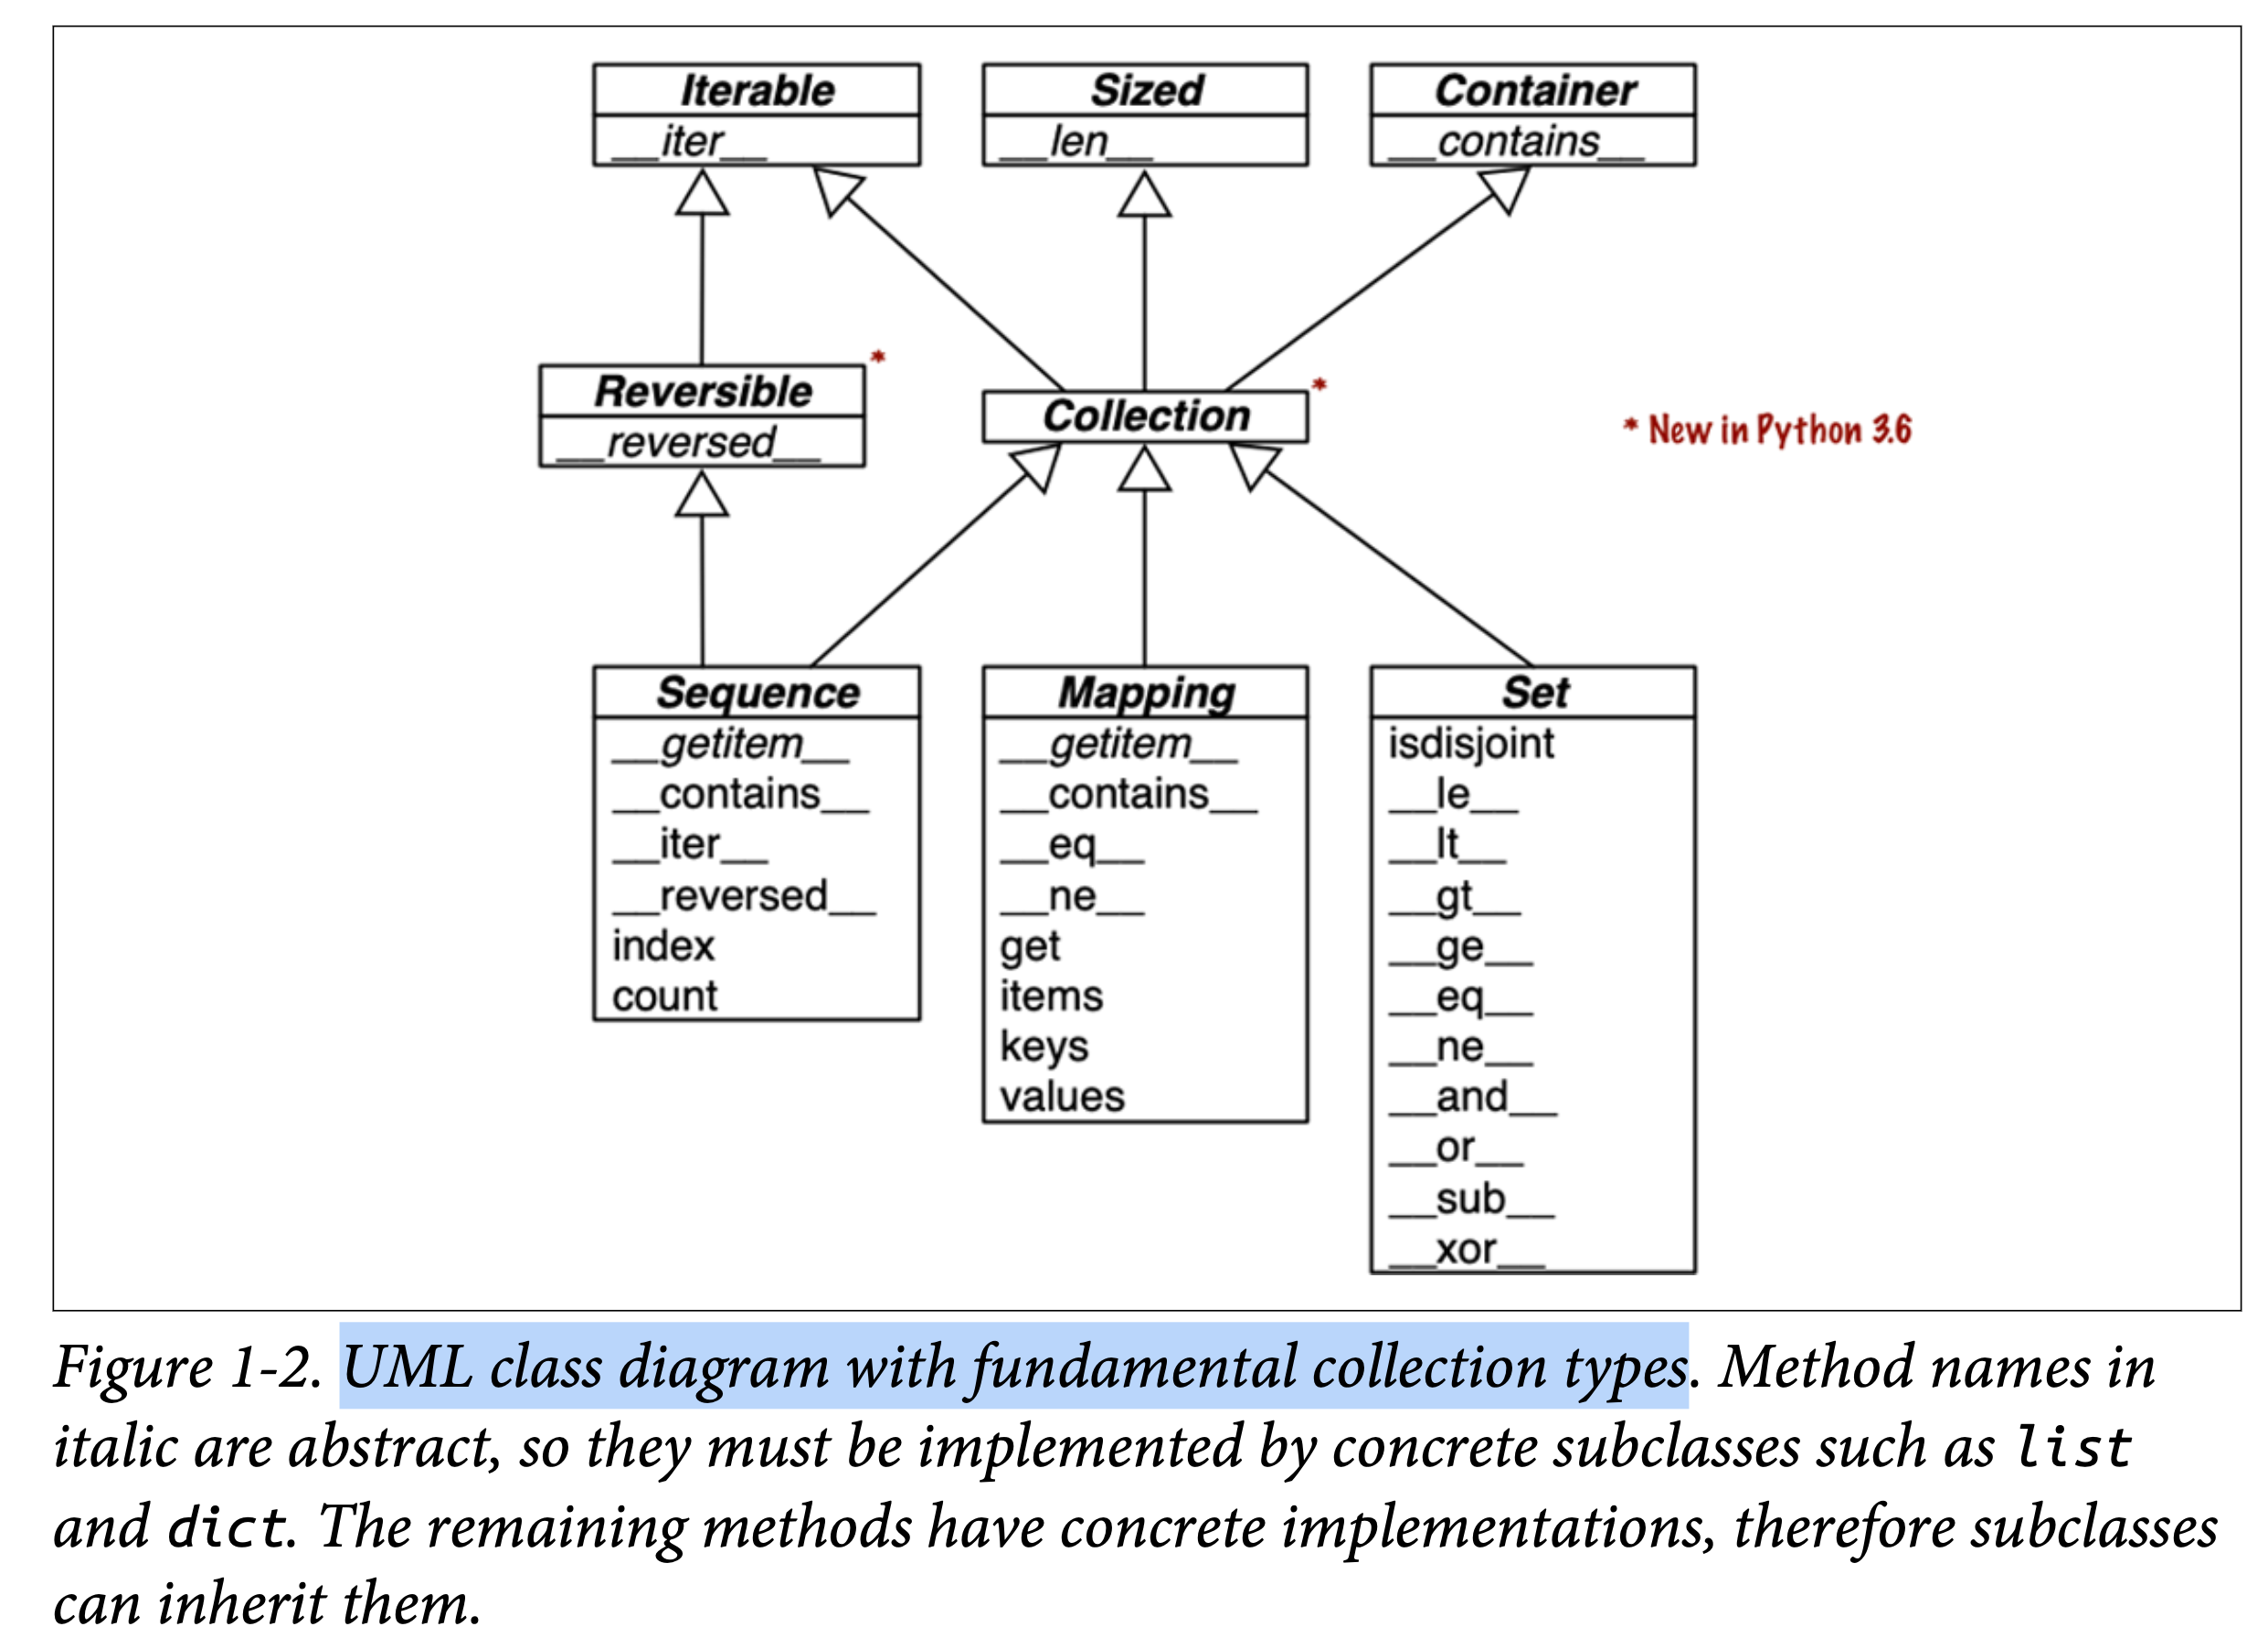